<a href="https://colab.research.google.com/github/mr-ayush-agrawal/DL_Notebooks/blob/main/Lect/Cat_Vs_Dog_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'dogs-vs-cats:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F84954%2F196452%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240720%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240720T024334Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D14367a2473f1917c19680b1239b286b6519017c59f350e259d210bdcf3fd46c679cd981f13c635ea6e5b5ce76978d73059e15cc527754bd0341cafa83a893045887b8b740f809a4694d860c8df060a13f966a18cb87ec5b9a88750f90d89a9014624de46c8a8e275fef96bce9a4174111383c5dd8f0aabdd2dec0d5adc627d7ce31a526eec67d533eb86a87d02e29045a5a7733ecc6b3aa500032ffdc9c2ab7d2caf5f593044915ae1a4cd2248d9533aaf3f5271106e658d129e9f2ab89d1f3303132c023a9a34f496f167fc9fa6d47d99395f1f3497e992e76c9e98e0cc652e08929268395f693c913765fec9ffc759306b1ed4797fbcf8f1a60f232078e07f'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 1142891694 bytes downloaded
Downloaded and uncompressed: dogs-vs-cats
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
count = 0
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        count += 1
print(count)
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Streaming output truncated to the last 5000 lines.
/kaggle/input/dogs-vs-cats/train/dogs/dog.2166.jpg
/kaggle/input/dogs-vs-cats/train/dogs/dog.780.jpg
/kaggle/input/dogs-vs-cats/train/dogs/dog.9064.jpg
/kaggle/input/dogs-vs-cats/train/dogs/dog.299.jpg
/kaggle/input/dogs-vs-cats/train/dogs/dog.5971.jpg
/kaggle/input/dogs-vs-cats/train/dogs/dog.3795.jpg
/kaggle/input/dogs-vs-cats/train/dogs/dog.332.jpg
/kaggle/input/dogs-vs-cats/train/dogs/dog.5733.jpg
/kaggle/input/dogs-vs-cats/train/dogs/dog.3036.jpg
/kaggle/input/dogs-vs-cats/train/dogs/dog.4157.jpg
/kaggle/input/dogs-vs-cats/train/dogs/dog.6717.jpg
/kaggle/input/dogs-vs-cats/train/dogs/dog.9095.jpg
/kaggle/input/dogs-vs-cats/train/dogs/dog.4621.jpg
/kaggle/input/dogs-vs-cats/train/dogs/dog.1939.jpg
/kaggle/input/dogs-vs-cats/train/dogs/dog.3368.jpg
/kaggle/input/dogs-vs-cats/train/dogs/dog.7858.jpg
/kaggle/input/dogs-vs-cats/train/dogs/dog.11222.jpg
/kaggle/input/dogs-vs-cats/train/dogs/dog.9979.jpg
/kaggle/input/dogs-vs-cats/train/

In [3]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

## Generators
This is used to read the data in batch

In [4]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/kaggle/input/dogs-vs-cats/train',
    labels = 'inferred',
    label_mode = 'int',    # this assigns 0,1 to the labels
    batch_size = 32,
    image_size = (256, 256),    # This shall reshape the images
)

val_ds = keras.utils.image_dataset_from_directory(
    directory = '/kaggle/input/dogs-vs-cats/test',
    labels = 'inferred',
    label_mode = 'int',    # this assigns 0,1 to the labels
    batch_size = 32,
    image_size = (256, 256),    # This shall reshape the images
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


## Normalize the dataset

In [5]:
def normalize_image(image, label):
    image = tf.cast(image/255, tf.float32)
    return image, label

train_ds = train_ds.map(normalize_image)
val_ds = val_ds.map(normalize_image)

## Creating a CNN Model

In [6]:
model = Sequential()

model.add(Conv2D(32, kernel_size =(3,3), padding = 'valid', activation = 'relu', input_shape=(256,256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(64, kernel_size =(3,3), padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(128, kernel_size =(3,3), padding = 'valid', activation = 'relu' ))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.1))

model.add(Dense(1, activation = 'sigmoid'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [8]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [9]:
history = model.fit(train_ds, epochs = 10, validation_data = val_ds)

Epoch 1/10
625/625 [==============================] - 82s 112ms/step - loss: 1.4308 - accuracy: 0.6105 - val_loss: 0.6320 - val_accuracy: 0.6452
Epoch 2/10
625/625 [==============================] - 65s 104ms/step - loss: 0.5684 - accuracy: 0.7082 - val_loss: 0.5094 - val_accuracy: 0.7480
Epoch 3/10
625/625 [==============================] - 70s 111ms/step - loss: 0.5023 - accuracy: 0.7560 - val_loss: 0.4992 - val_accuracy: 0.7572
Epoch 4/10
625/625 [==============================] - 68s 109ms/step - loss: 0.4234 - accuracy: 0.8051 - val_loss: 0.4187 - val_accuracy: 0.7986
Epoch 5/10
625/625 [==============================] - 67s 107ms/step - loss: 0.3636 - accuracy: 0.8374 - val_loss: 0.4821 - val_accuracy: 0.7788
Epoch 6/10
625/625 [==============================] - 89s 141ms/step - loss: 0.3047 - accuracy: 0.8671 - val_loss: 0.4659 - val_accuracy: 0.7902
Epoch 7/10
625/625 [==============================] - 65s 104ms/step - loss: 0.2346 - accuracy: 0.9063 - val_loss: 0.5116 - val_ac

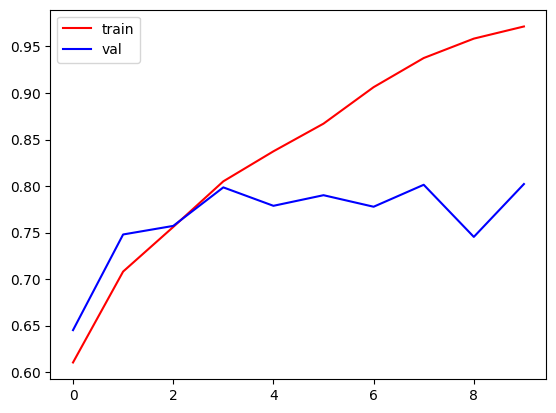

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color= 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color= 'b', label = 'val')
plt.title("Accuray train vs val")

plt.legend()
plt.show()

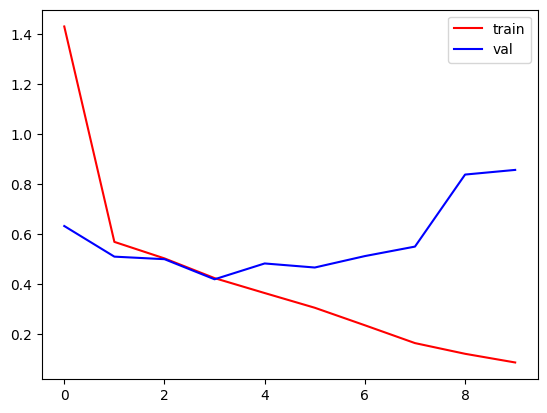

In [11]:
plt.plot(history.history['loss'], color= 'red', label = 'train')
plt.plot(history.history['val_loss'], color= 'b', label = 'val')
plt.title("Loss train vs val")

plt.legend()
plt.show()